In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_train_path = 'data/train'
data_test_path = 'data/test'
data_val_path = 'data/validation'

In [3]:
img_width = 180
img_height =180

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 2527 files belonging to 6 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 2527 files belonging to 6 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 2527 files belonging to 6 classes.


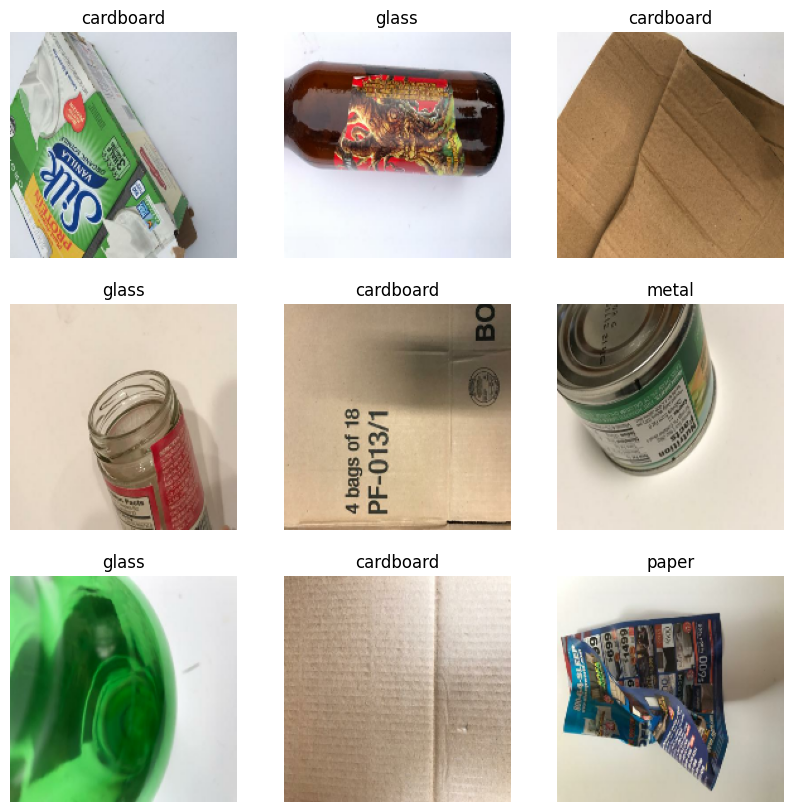

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data_cat))

])

In [21]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [23]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 184ms/step - accuracy: 0.9798 - loss: 0.0868 - val_accuracy: 0.9715 - val_loss: 0.0949
Epoch 2/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 192ms/step - accuracy: 0.9628 - loss: 0.1205 - val_accuracy: 0.9577 - val_loss: 0.1104
Epoch 3/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 197ms/step - accuracy: 0.9803 - loss: 0.0782 - val_accuracy: 0.9497 - val_loss: 0.1507
Epoch 4/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 0.9651 - loss: 0.1016 - val_accuracy: 0.9798 - val_loss: 0.0818
Epoch 5/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 199ms/step - accuracy: 0.9809 - loss: 0.0664 - val_accuracy: 0.9929 - val_loss: 0.0350
Epoch 6/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 200ms/step - accuracy: 0.9914 - loss: 0.0361 - val_accuracy: 0.9929 - val_loss: 0.0379
Epoch 7/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 199ms/step - accuracy: 0.9925 - loss: 0.0334 - val_accuracy: 0.9929 - val_loss: 0.0372
Epoch 8/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 198ms/step - accuracy: 0.9829 - loss: 0.0589 - val_accu

Text(0.5, 1.0, 'Loss')

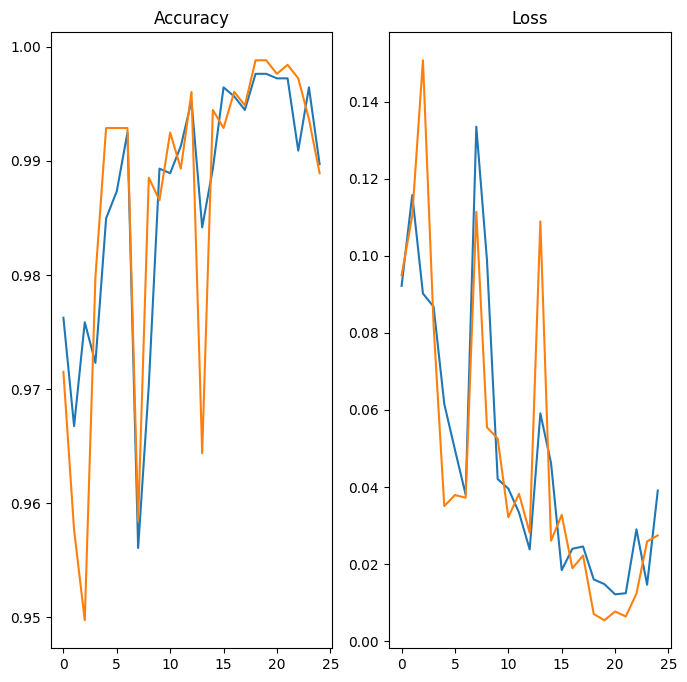

In [24]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [70]:
image = 'test5.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [71]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [72]:
score = tf.nn.softmax(predict)

In [73]:
print('Waste in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Waste in image is metal with accuracy of 99.95


In [74]:
model.save('Image_classify.keras')